# **Feature Selection and Feature Importance**

In [1]:
import csv
import time
import pandas as pd
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, SelectFromModel, RFE

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Import helperfunctions
from ML_functions import fun_load_data, fun_preprocessing, fun_scores

# Assign string 'TSP' or 'CVRP' to the following variable to define the optimization problem
optimization_problem = 'TSP'
train_size = 0.7

# Load data
data = fun_load_data(optimization_problem)
X, y, train_data = fun_preprocessing(data)

# Create a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

### **1. Univariate statistics**

**Univariate Statistical Test:**<br>
The score is derived from a univariate statistical test that evaluates each feature independently against the target variable.

- F-test in f_regression:<br>
    The F-test assesses the linear relationship between each feature and the target variable.<br>
    The test calculates the F-statistic for each feature, which is the ratio of explained variance to unexplained variance.

    Explained Variance: The variance in the target variable that can be explained by the feature.<br>
    Unexplained Variance: The variance in the target variable that remains unexplained by the feature.<br>
    -> A higher F-statistic indicates a stronger relationship between the feature and the target variable.<br>

- P-value:<br>
    Alongside the F-statistic, a p-value is computed to determine the statistical significance of the observed relationship.<br>
    The p-value indicates the probability of observing the computed F-statistic.

In [19]:
# Perform univariate feature selection (with SelectKBest or SelectPercentile)
select = SelectKBest(k=41, score_func=f_regression)
#select = SelectPercentile(percentile=50, score_func=f_regression)
select.fit(X_train, y_train)
selected_features = select.get_feature_names_out()
dropped_features = np.array(X_train.columns[~select.get_support()])
X_train_selected = X_train[selected_features]

# Show shapes of DataFrames and names of selected and not selected features
print('X_train.shape: {}'.format(X_train.shape))
print('X_train_selected.shape: {}'.format(X_train_selected.shape))
print('\nSelected features:\n', selected_features)
print('\nNot selected features:\n', dropped_features)

X_train.shape: (62999, 43)
X_train_selected.shape: (62999, 41)

Selected features:
 ['Instance ID' 'Number Customers' 'X Ratio' 'Y Ratio' 'Y Depot'
 'Depot Distance Ratio' 'Closest Customer Distance (CCD) Ratio'
 '2nd CCD Ratio' '3rd CCD Ratio' '4th CCD Ratio' '5th CCD Ratio'
 '6th CCD Ratio' '7th CCD Ratio' '8th CCD Ratio' '9th CCD Ratio'
 '10th CCD Ratio' 'Mean Distance To Other Customers Ratio'
 'Gravity Center Distance Ratio' 'Cluster' 'Number Clusters'
 'Number Outliers' 'Cluster Size' 'X Centroid' 'Y Centroid'
 'Centroid Distance Ratio' 'Centroid Distance To Depot Ratio'
 'Distance To Closest Other Cluster Ratio'
 'Distance To Closest Other Centroid Ratio' 'Cluster Area Ratio'
 'Cluster Density Ratio' 'X Std' 'Y Std' 'X Max' 'Y Max' 'Y Min'
 'Correlation' 'Skewness X' 'Skewness Y' 'Savings Ratio'
 'Marginal Costs Ratio' 'Total Costs']

Not selected features:
 ['X Depot' 'X Min']


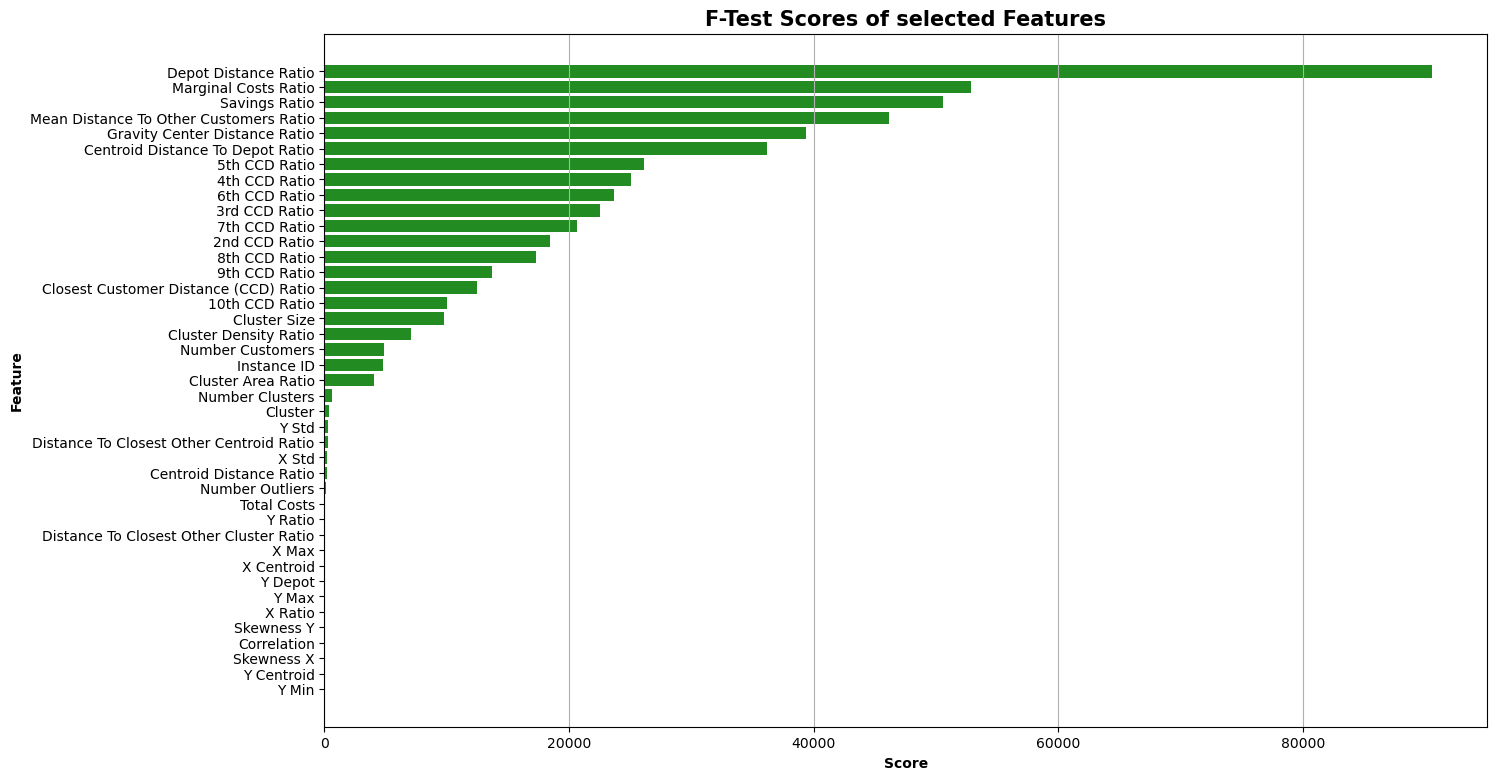

,Instance ID,Number Customers,X Ratio,Y Ratio,Y Depot,Depot Distance Ratio,Closest Customer Distance (CCD) Ratio,2nd CCD Ratio,3rd CCD Ratio,4th CCD Ratio,...,Y Std,X Max,Y Max,Y Min,Correlation,Skewness X,Skewness Y,Savings Ratio,Marginal Costs Ratio,Total Costs
34455,4446,10,0.684003,1.838429,19.634044,1.471037,1.538669,1.578939,1.364605,1.363126,...,23.039928,77.007847,98.524744,13.010925,-0.043592,-0.159621,0.046726,3.344154,3.287885,275.366024
56853,6488,12,2.101419,0.379948,95.790970,1.700664,2.095396,1.516192,1.465519,1.648872,...,22.882600,96.368436,78.020422,2.034546,-0.128830,0.342294,0.107151,4.752810,4.474745,347.795769
73308,7793,13,0.256518,1.173104,5.804076,0.612096,1.226849,1.493640,1.258136,1.073734,...,31.913626,96.806833,94.045358,1.685219,-0.290583,-0.756845,0.586398,0.458214,0.427659,367.355553
37047,4705,10,1.483191,1.966353,99.060958,0.370644,1.240013,1.057373,1.244164,1.175930,...,29.009627,95.602156,99.473675,10.212913,0.041086,-0.091189,0.716341,0.463998,0.433476,378.511971
10380,1626,7,0.381215,0.848405,47.875972,1.208815,1.127305,0.806745,0.780143,0.822712,...,32.110897,77.528114,93.572978,7.640460,-0.043729,0.131984,0.141628,0.027008,0.027008,298.938231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1038,7,0.643569,0.974493,28.081315,0.516104,0.611866,0.566971,0.604516,0.675458,...,12.857054,91.180534,65.694376,19.861622,0.184011,0.664045,-0.624790,0.140142,0.124676,200.817306
54886,6324,12,1.381460,1.693959,5.016980,1.432993,1.020730,0.900190,0.962504,1.037500,...,27.009565,94.580742,93.885782,8.402793,-0.050368,-0.326451,-0.447085,1.588033,1.495133,334.493107
76820,8059,14,0.592806,0.535516,99.237549,1.451702,0.524391,0.454905,0.575245,0.487948,...,25.439007,93.350777,97.025343,20.172698,0.259396,-0.078845,0.518284,0.041598,0.037504,309.533164
860,144,6,1.711167,1.324831,48.016658,0.763839,0.414556,0.971147,0.959420,1.051474,...,22.914165,89.125361,79.063253,23.879798,0.830236,0.161535,-0.561318,0.001668,0.001668,209.337369


In [20]:
# Create data frame with p-values and scores for all features
df_f_test = pd.DataFrame({'Feature': X_train.columns, 'P-Value': select.pvalues_, 'Scores F-Test': select.scores_})

# Get selected features only and sort them by their score
df_f_test_selection = df_f_test.iloc[select.get_support()]
df_f_test_selection = df_f_test_selection.sort_values(by='Scores F-Test')

# Visualize scores of selected features
plt.figure(figsize=(15, 9))
plt.barh(y=df_f_test_selection['Feature'], width=df_f_test_selection['Scores F-Test'], color='forestgreen')
plt.xlabel('Score', size=10, fontweight='bold')
plt.ylabel('Feature', size=10, fontweight='bold')
plt.title('F-Test Scores of selected Features', size=15, fontweight='bold')
plt.grid(axis='x')
plt.show()

# Display data frame with remaining features
display(X_train[selected_features])

In [21]:
print('Train score with all features:')
model_results_dict = fun_scores(model=LinearRegression(), X_train=X_train, y_train=y_train)

print('\nTrain score with selected features:')
model_results_dict = fun_scores(model=LinearRegression(), X_train=X_train_selected, y_train=y_train)

Train score with all features:
CV MAPE (scaled) train data:  23.7618 %
CV RMSE (scaled) train data: 7.6303
CV computation time: 0s

Train score with selected features:
CV MAPE (scaled) train data:  23.4517 %
CV RMSE (scaled) train data: 7.266
CV computation time: 0s


### **2. Model-based feature selection**

In [22]:
# Select all features with score (importance) above threshold
select = SelectFromModel(estimator=RandomForestRegressor(n_estimators=10, max_depth=None, random_state=0),
                         threshold=0.0005)

# Fit model on the train set and transform it
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_selected.shape: {}'.format(X_train_selected.shape))

# Show names of selected and not selected features
selected_features = select.get_feature_names_out()
dropped_features = np.array(X_train.columns[~select.get_support()])
print('\nSelected features:\n', selected_features)
print('\nNot selected features:\n', dropped_features)

X_train.shape: (62999, 43)
X_train_selected.shape: (62999, 40)

Selected features:
 ['Instance ID' 'Number Customers' 'X Ratio' 'Y Ratio' 'X Depot' 'Y Depot'
 'Depot Distance Ratio' 'Closest Customer Distance (CCD) Ratio'
 '2nd CCD Ratio' '3rd CCD Ratio' '4th CCD Ratio' '5th CCD Ratio'
 '6th CCD Ratio' '7th CCD Ratio' '8th CCD Ratio' '9th CCD Ratio'
 '10th CCD Ratio' 'Mean Distance To Other Customers Ratio'
 'Gravity Center Distance Ratio' 'Cluster Size' 'X Centroid' 'Y Centroid'
 'Centroid Distance Ratio' 'Centroid Distance To Depot Ratio'
 'Distance To Closest Other Cluster Ratio'
 'Distance To Closest Other Centroid Ratio' 'Cluster Area Ratio'
 'Cluster Density Ratio' 'X Std' 'Y Std' 'X Max' 'Y Max' 'X Min' 'Y Min'
 'Correlation' 'Skewness X' 'Skewness Y' 'Savings Ratio'
 'Marginal Costs Ratio' 'Total Costs']

Not selected features:
 ['Cluster' 'Number Clusters' 'Number Outliers']


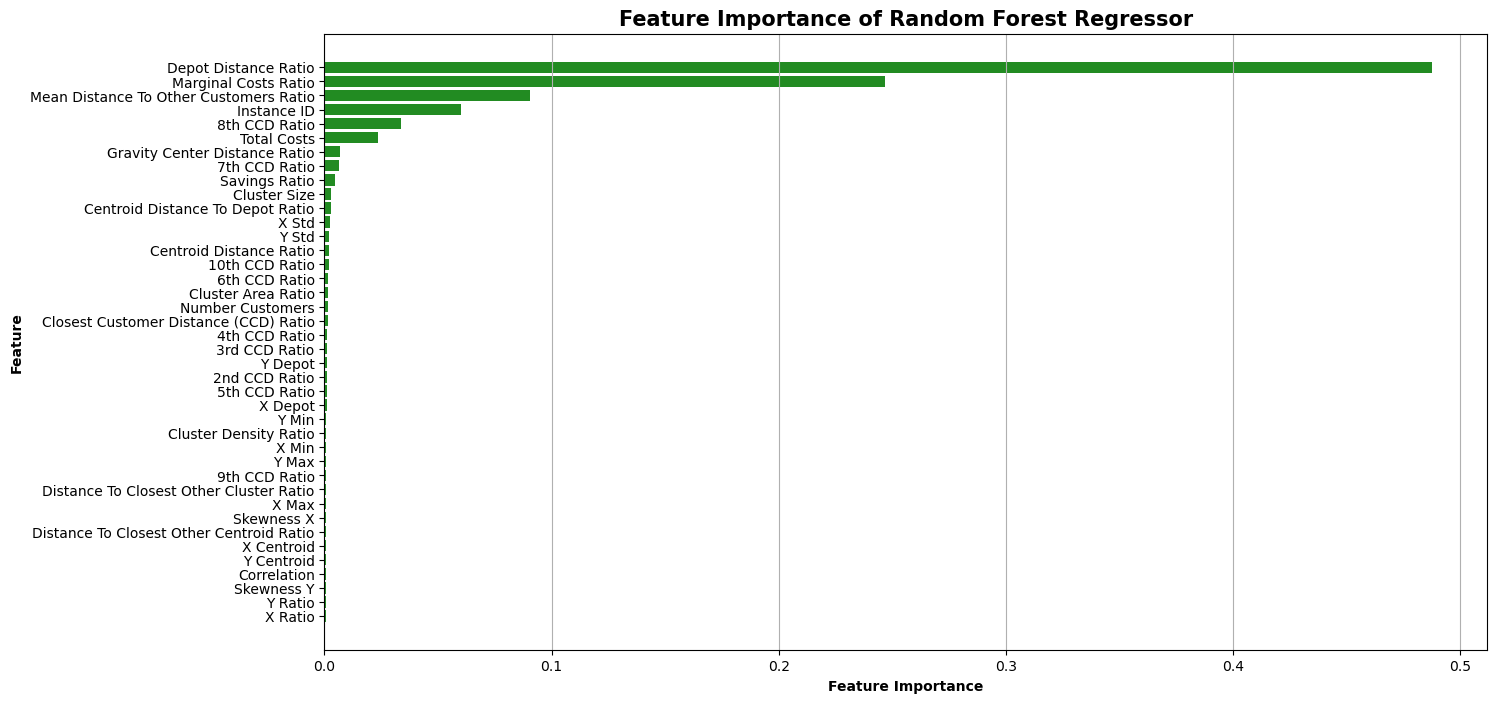

,Instance ID,Number Customers,X Ratio,Y Ratio,X Depot,Y Depot,Depot Distance Ratio,Closest Customer Distance (CCD) Ratio,2nd CCD Ratio,3rd CCD Ratio,...,X Max,Y Max,X Min,Y Min,Correlation,Skewness X,Skewness Y,Savings Ratio,Marginal Costs Ratio,Total Costs
34455,4446,10,0.684003,1.838429,16.072567,19.634044,1.471037,1.538669,1.578939,1.364605,...,77.007847,98.524744,13.836788,13.010925,-0.043592,-0.159621,0.046726,3.344154,3.287885,275.366024
56853,6488,12,2.101419,0.379948,5.936504,95.790970,1.700664,2.095396,1.516192,1.465519,...,96.368436,78.020422,9.470813,2.034546,-0.128830,0.342294,0.107151,4.752810,4.474745,347.795769
73308,7793,13,0.256518,1.173104,19.102231,5.804076,0.612096,1.226849,1.493640,1.258136,...,96.806833,94.045358,3.802737,1.685219,-0.290583,-0.756845,0.586398,0.458214,0.427659,367.355553
37047,4705,10,1.483191,1.966353,96.929029,99.060958,0.370644,1.240013,1.057373,1.244164,...,95.602156,99.473675,1.521105,10.212913,0.041086,-0.091189,0.716341,0.463998,0.433476,378.511971
10380,1626,7,0.381215,0.848405,81.789004,47.875972,1.208815,1.127305,0.806745,0.780143,...,77.528114,93.572978,9.585648,7.640460,-0.043729,0.131984,0.141628,0.027008,0.027008,298.938231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1038,7,0.643569,0.974493,25.243357,28.081315,0.516104,0.611866,0.566971,0.604516,...,91.180534,65.694376,22.121417,19.861622,0.184011,0.664045,-0.624790,0.140142,0.124676,200.817306
54886,6324,12,1.381460,1.693959,53.888516,5.016980,1.432993,1.020730,0.900190,0.962504,...,94.580742,93.885782,1.999799,8.402793,-0.050368,-0.326451,-0.447085,1.588033,1.495133,334.493107
76820,8059,14,0.592806,0.535516,90.858894,99.237549,1.451702,0.524391,0.454905,0.575245,...,93.350777,97.025343,14.801357,20.172698,0.259396,-0.078845,0.518284,0.041598,0.037504,309.533164
860,144,6,1.711167,1.324831,69.486220,48.016658,0.763839,0.414556,0.971147,0.959420,...,89.125361,79.063253,8.373461,23.879798,0.830236,0.161535,-0.561318,0.001668,0.001668,209.337369


In [25]:
# Create data frame with feature importance s for all features
df_model_based = pd.DataFrame({'Feature': X_train.columns, 'Scores Model-based Selection': select.estimator_.feature_importances_})

# Get selected features only and sort them by their score
df_model_based_selection = df_model_based.iloc[select.get_support()]
df_model_based_selection = df_model_based_selection.sort_values(by='Scores Model-based Selection')

# Visualize scores of selected features
plt.figure(figsize=(15, 8))
plt.barh(y=df_model_based_selection['Feature'], width=df_model_based_selection['Scores Model-based Selection'], color='forestgreen')
plt.xlabel('Feature Importance', size=10, fontweight='bold')
plt.ylabel('Feature', size=10, fontweight='bold')
plt.title('Feature Importance of Random Forest Regressor', size=15, fontweight='bold')
plt.grid(axis='x')
plt.show()

# Display data frame with remaining features
display(X_train[selected_features])

In [24]:
print('Train score with all features:')
model_results_dict = fun_scores(model=LinearRegression(), X_train=X_train, y_train=y_train)

print('\nTrain score with selected features:')
model_results_dict = fun_scores(model=LinearRegression(), X_train=X_train_selected, y_train=y_train)

Train score with all features:
CV MAPE (scaled) train data:  23.7618 %
CV RMSE (scaled) train data: 7.6303
CV computation time: 0s

Train score with selected features:
CV MAPE (scaled) train data:  nan %
CV RMSE (scaled) train data: nan
CV computation time: 0s


### **3. Iterative feature selection (recursive feature elimination)**

In [8]:
# Apply recursive feature elimination
select = RFE(RandomForestRegressor(n_estimators=1, random_state=0),
             n_features_to_select=25)

# Fit model on the train set and transform it
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_selected.shape: {}'.format(X_train_selected.shape))

# Show names of selected and not selected features
selected_features = select.get_feature_names_out()
dropped_features = np.array(X_train.columns[~select.get_support()])
print('\nSelected features:\n', selected_features)
print('\nNot selected features:\n', dropped_features)

X_train.shape: (67500, 68)
X_train_selected.shape: (67500, 25)

Selected features:
 ['Instance ID' 'Depot Distance' 'Closest Customer Distance (CCD)'
 '2nd CCD' '3rd CCD' '4th CCD' '5th CCD' '6th CCD' '7th CCD' '8th CCD'
 '9th CCD' '10th CCD' 'Mean Distance To Other Customers'
 'Gravity Center Distance' 'Centroid Distance To Depot' 'X Std' 'Y Std'
 'Savings' 'Marginal Costs' 'Depot Distance Ratio' '2nd CCD Ratio'
 '4th CCD Ratio' 'Mean Distance To Other Customers Ratio'
 'Gravity Center Distance Ratio' 'Marginal Costs Ratio']

Not selected features:
 ['Number Customers' 'X' 'Y' 'X Depot' 'Y Depot' 'Cluster' 'Core Point'
 'Outlier' 'Number Clusters' 'Number Outliers' 'Cluster Size' 'X Centroid'
 'Y Centroid' 'Centroid Distance' 'Distance To Closest Other Cluster'
 'Distance To Closest Other Centroid' 'Cluster Area' 'Cluster Density'
 'X Mean' 'Y Mean' 'X Max' 'Y Max' 'X Min' 'Y Min' 'Correlation'
 'Skewness X' 'Skewness Y' 'Total Costs'
 'Closest Customer Distance (CCD) Ratio' '3rd CCD 

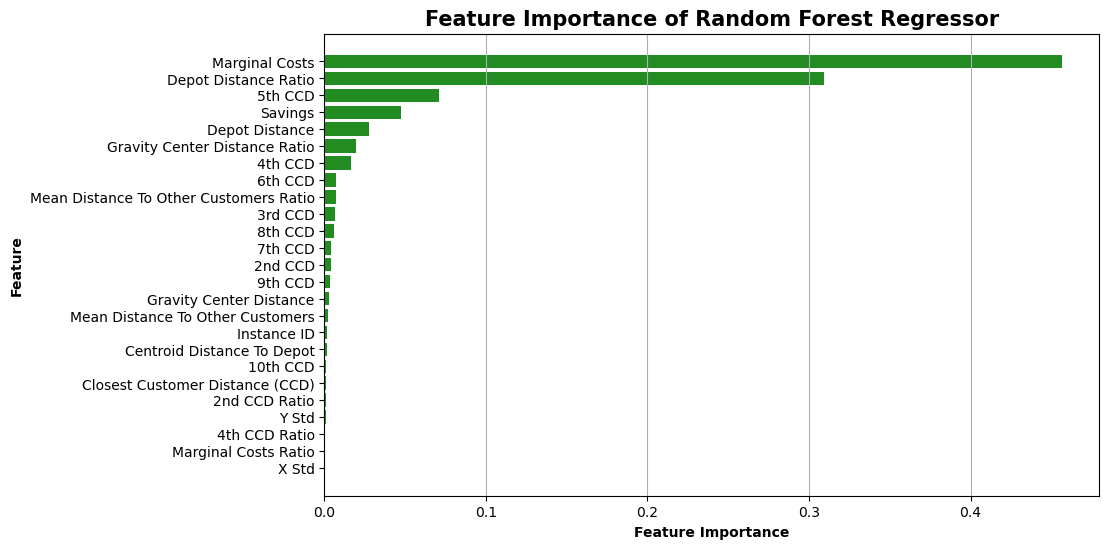

,Instance ID,Depot Distance,Closest Customer Distance (CCD),2nd CCD,3rd CCD,4th CCD,5th CCD,6th CCD,7th CCD,8th CCD,...,X Std,Y Std,Savings,Marginal Costs,Depot Distance Ratio,2nd CCD Ratio,4th CCD Ratio,Mean Distance To Other Customers Ratio,Gravity Center Distance Ratio,Marginal Costs Ratio
69677,7514,74.382412,9.328826,11.977744,39.997353,54.165422,55.158214,59.046042,59.188066,61.347884,...,27.351370,27.062338,4.577470,4.577470,1.436450,0.587607,1.338558,1.006776,0.998140,0.777717
34646,4465,25.187236,5.800107,24.128578,26.210727,30.255220,41.380217,43.693820,47.863230,52.251134,...,19.552630,19.195561,2.911537,2.911537,0.970934,1.112578,0.877585,0.980556,0.998254,0.342628
86125,8724,59.381098,15.401211,41.508458,51.034661,54.656432,56.586294,63.330553,65.559097,73.359645,...,32.589097,25.984878,14.062999,18.526416,1.313578,1.559002,1.352400,1.221112,1.457002,1.532811
82264,8448,24.713368,17.196267,17.435241,22.752606,42.408433,53.318260,56.669691,58.855922,62.714615,...,26.838582,25.878807,21.953203,22.779835,0.585547,0.741343,1.183157,1.148622,1.394605,1.674071
53677,6224,25.307497,5.802874,20.672112,23.494538,29.873365,31.667380,54.272416,59.245911,62.829733,...,29.752607,25.821655,5.467586,5.467586,0.480132,0.812510,0.731426,0.908896,0.941747,0.388802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,3028,39.409196,6.424186,17.933495,28.809265,38.139905,40.506850,43.763301,45.068853,69.921217,...,26.362948,23.226683,6.300977,6.300977,0.882335,0.566722,0.858811,0.748210,0.465359,0.385324
45891,5536,34.752013,13.622506,21.530891,24.221070,24.661004,29.205016,45.075369,51.772940,52.840465,...,23.630370,29.899673,18.449769,18.449769,0.794361,0.723634,0.619172,0.735322,0.245055,1.469491
42613,5238,74.887159,18.666533,33.682718,35.668402,64.571275,69.313584,70.062025,73.033907,74.877804,...,30.330037,30.720834,25.877118,25.877118,1.159858,1.100242,1.275735,1.053047,1.129548,2.330522
43567,5325,91.367357,15.571359,17.349100,23.169903,28.555908,51.598820,54.252643,66.131205,66.793532,...,30.848541,20.382368,12.209419,12.209419,1.536806,0.867525,0.723371,1.021288,1.135786,2.122455


In [9]:
# Create data frame with feature importances for all selected features
df_iterative_selection = pd.DataFrame({'Feature': X_train.columns[select.get_support()], 'Scores Iterative Selection': select.estimator_.feature_importances_})

# Sort features
df_iterative_selection = df_iterative_selection.sort_values(by='Scores Iterative Selection')

# Visualize scores of selected features
plt.figure(figsize=(10, 6))
plt.barh(y=df_iterative_selection['Feature'], width=df_iterative_selection['Scores Iterative Selection'], color='forestgreen')
plt.xlabel('Feature Importance', size=10, fontweight='bold')
plt.ylabel('Feature', size=10, fontweight='bold')
plt.title('Feature Importance of Random Forest Regressor', size=15, fontweight='bold')
plt.grid(axis='x')
plt.show()

# Display data frame with remaining features
display(X_train[selected_features])

In [10]:
print('Train score with all features:')
model_results_dict = fun_scores(model=LinearRegression(), X_train=X_train, y_train=y_train, cv=5)

print('\nTrain score with selected features:')
model_results_dict = fun_scores(model=LinearRegression(), X_train=X_train_selected, y_train=y_train, cv=5)

Train score with all features:
  CV MAPE train data:  16.1503 %
  CV RMSE train data:  3.2184
  CV computation time: 0 sec

Train score with selected features:
  CV MAPE train data:  16.5501 %
  CV RMSE train data:  3.2909
  CV computation time: 0 sec


### **Analyse resullts**

In [11]:
# Get a set of all feature selections
A = set(df_f_test_selection['Feature'])
B = set(df_model_based_selection['Feature'])
C = set(df_iterative_selection['Feature'])

# Get a list of the union of selected features and count the number of appearances for all features
all_selected_features = A.union(B, C)
all_features = list(A) + list(B) + list(C)
feature_counts = pd.Series(all_features).value_counts()

# Create a data frame with all at least once selected features, add their scores of the thre methods from above and sort them by their counts and F-test score
df_all_scores = pd.DataFrame(data={'Feature': list(all_selected_features)})
df_all_scores = pd.merge(left=df_all_scores, right=feature_counts, left_on='Feature', right_index=True, how='outer')
df_all_scores = pd.merge(left=df_all_scores, right=df_f_test_selection[['Feature', 'Scores F-Test']], on='Feature', how='outer').sort_values(by=['count', 'Scores F-Test'], ascending=False)
df_all_scores = pd.merge(left=df_all_scores, right=df_model_based_selection, on='Feature', how='outer').reset_index(drop=True)
df_all_scores = pd.merge(left=df_all_scores, right=df_iterative_selection, on='Feature', how='outer')
df_all_scores#.head(20)

,Feature,count,Scores F-Test,Scores Model-based Selection,Scores Iterative Selection
0,Depot Distance Ratio,3,97324.104208,0.304473,0.309043
1,Marginal Costs,3,86849.239844,0.479095,0.456930
2,Savings,3,85700.279738,0.028003,0.047266
3,Depot Distance,3,68464.539563,0.028818,0.027889
4,Marginal Costs Ratio,3,56927.529066,0.001013,0.000627
5,Mean Distance To Other Customers Ratio,3,50076.369615,0.014242,0.007097
6,Mean Distance To Other Customers,3,43298.387693,0.002255,0.002270
7,Gravity Center Distance Ratio,3,42817.953555,0.008453,0.019814
8,Gravity Center Distance,3,41461.681570,0.004072,0.002579
9,4th CCD,3,37104.383167,0.016239,0.016452


In [11]:
list(df_all_scores['Feature'])

if (optimization_problem == 'TSP'):
    # Select the most important features and add 'Total Costs'
    top_features = ['Depot Distance Ratio', 'Marginal Costs', 'Savings', 'Depot Distance', 'Marginal Costs Ratio', 'Mean Distance To Other Customers Ratio', 
                    'Mean Distance To Other Customers', 'Gravity Center Distance Ratio', 'Gravity Center Distance', 'Total Costs', '4th CCD', '3rd CCD', 
                    '5th CCD', '2nd CCD', 'Centroid Distance To Depot', 'Closest Customer Distance (CCD)', '4th CCD Ratio', 'Savings Ratio']

    # Select the most important ratio features and add 'Total Costs'
    top_ratio_features = ['Depot Distance Ratio', 'Marginal Costs Ratio', 'Savings Ratio', 'Mean Distance To Other Customers Ratio', 
                        'Gravity Center Distance Ratio', 'Total Costs', '4th CCD Ratio', '3rd CCD Ratio', '5th CCD Ratio', '2nd CCD Ratio', 
                        'Centroid Distance To Depot Ratio', 'Closest Customer Distance (CCD) Ratio', '8th CCD Ratio', '6th CCD Ratio', '7th CCD Ratio', '9th CCD Ratio']

if (optimization_problem == 'CVRP'):
    # Select the most important features and add 'Total Costs'
    top_features = ['Depot Distance Ratio', 'Marginal Costs', 'Savings', 'Depot Distance', 'Marginal Costs Ratio', 'Mean Distance To Other Customers Ratio', 
                    'Mean Distance To Other Customers', 'Gravity Center Distance Ratio', 'Gravity Center Distance', 'Total Costs', '4th CCD', '3rd CCD', 
                    '5th CCD', '2nd CCD', 'Centroid Distance To Depot', 'Closest Customer Distance (CCD)', '4th CCD Ratio', 'Savings Ratio']

    # Select the most important ratio features and add 'Total Costs'
    top_ratio_features = ['Depot Distance Ratio', 'Marginal Costs Ratio', 'Savings Ratio', 'Mean Distance To Other Customers Ratio', 
                        'Gravity Center Distance Ratio', 'Total Costs', '4th CCD Ratio', '3rd CCD Ratio', '5th CCD Ratio', '2nd CCD Ratio', 
                        'Centroid Distance To Depot Ratio', 'Closest Customer Distance (CCD) Ratio', '8th CCD Ratio', '6th CCD Ratio', '7th CCD Ratio', '9th CCD Ratio']

In [12]:
# Save the list into a .csv-file
with open('02_best_features/top_features' + appendix, 'w') as f:
    write = csv.writer(f)
    write.writerow(top_features)

# Save the list into a .csv-file
with open('02_best_features/top_ratio_features' + appendix, 'w') as f:
    write = csv.writer(f)
    write.writerow(top_ratio_features)